In [83]:
import pandas as pnd

In [84]:
import os

In [85]:
years_begin = 1900
years_end = 2000
years_step = 5
years_chck = [1950]
path_name = 'names'
children_names = ['Ruth', 'Robert']
ntop = 10

In [86]:
DATA_PATH = os.path.join(os.getcwd(),path_name)

In [87]:
DATA_PATH

'C:\\Users\\irina\\source\\repos\\ex4-2\\names'

In [88]:
data_pathes = []
data_years = []
for year in range(years_begin, years_end):
    str_year = "yob" + str(year)+ ".txt"
    path_test = os.path.join(DATA_PATH, str_year)
    if os.path.exists(path_test) and os.path.isfile(path_test):
        data_pathes.append(path_test)
        data_years.append(year)
str_ch_names = '","'.join(children_names)

In [89]:
str_ch_names = 'Name == ["'+str_ch_names+'"]'

In [90]:
data_for_analytics = []
for dp in data_pathes:
    data_for_analytics.append(pnd.read_csv(dp, names = ['Name', 'Gender', 'Count']))

In [91]:
for data_elem_analytics, year_elem in zip(data_for_analytics, data_years):
    len_df = len(data_elem_analytics)
    year_series = pnd.Series((year_elem) for i in range(len_df))
    data_elem_analytics['Year'] = year_series

In [92]:
if len(data_for_analytics):
    data_by_all_years_with_years = pnd.concat(data_for_analytics)
    data_by_children_by_all_year = data_by_all_years_with_years.query(str_ch_names)

In [93]:
grouped_data = data_by_children_by_all_year.groupby(['Year', 'Name']).sum()

In [94]:
plot_data = grouped_data.unstack('Name')

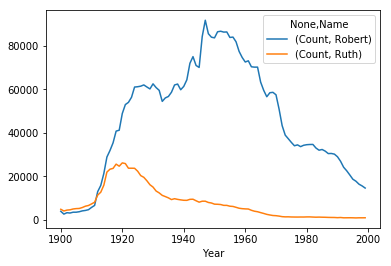

In [95]:
plot_data.plot()

In [96]:
data_pathes = []
data_years = []
for year in range(years_begin, years_end, years_step):
    str_year = "yob" + str(year)+ ".txt"
    path_test = os.path.join(DATA_PATH, str_year)
    if os.path.exists(path_test) and os.path.isfile(path_test):
        data_pathes.append(path_test)
        data_years.append(year)

data_for_analytics = []
for dp in data_pathes:
    data_for_analytics.append(pnd.read_csv(dp, names = ['Name', 'Gender', 'Count']))

for data_elem_analytics, year_elem in zip(data_for_analytics, data_years):
    len_df = len(data_elem_analytics)
    year_series = pnd.Series((year_elem) for i in range(len_df))
    data_elem_analytics['Year'] = year_series

if len(data_for_analytics):
    data_by_all_years_with_years = pnd.concat(data_for_analytics)
    data_by_children_by_all_year = data_by_all_years_with_years.query(str_ch_names)

grouped_data = data_by_children_by_all_year.groupby(['Year', 'Name']).sum()

plot_data = grouped_data.unstack('Name')

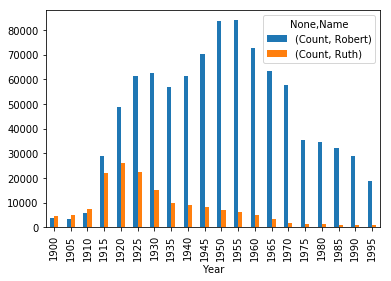

In [97]:
plot_data.plot.bar()

In [98]:
data_pathes = []
data_years = []
for year in years_chck:
    str_year = "yob" + str(year)+ ".txt"
    path_test = os.path.join(DATA_PATH, str_year)
    if os.path.exists(path_test) and os.path.isfile(path_test):
        data_pathes.append(path_test)
        data_years.append(year)

data_for_analytics = []
for dp in data_pathes:
    data_for_analytics.append(pnd.read_csv(dp, names = ['Name', 'Gender', 'Count']))

for data_elem_analytics, year_elem in zip(data_for_analytics, data_years):
    len_df = len(data_elem_analytics)
    year_series = pnd.Series((year_elem) for i in range(len_df))
    data_elem_analytics['Year'] = year_series

if len(data_for_analytics):
    data_by_all_years_with_years = pnd.concat(data_for_analytics)
    data_by_children_with_years = data_by_all_years_with_years.set_index('Name').filter(regex='^R', axis=0)

In [99]:
grouped_data = data_by_children_with_years.drop('Year', axis=1).groupby(['Name', 'Gender']).sum()

In [100]:
grouped_data

,,Count
Name,Gender,
Rabon,M,5
Rachael,F,88
Racheal,F,20
Rachel,F,1453
Rachele,F,8
Rachell,F,15
Rachelle,F,111
Rada,F,6
Radames,M,5


In [101]:
plot_data = grouped_data.nlargest(ntop, 'Count')

In [102]:
plot_data

,,Count
Name,Gender,
Robert,M,83565
Richard,M,51001
Ronald,M,29916
Roger,M,12548
Raymond,M,11179
Rebecca,F,9427
Ruth,F,7128
Roy,M,6456
Rita,F,6424


([<matplotlib.patches.Wedge at 0x25a54ef0>,
 [Text(0.427399,1.01357,u''),
  Text(-1.09622,0.09116,u''),
  Text(-0.545755,-0.955066,u''),
  Text(0.0838263,-1.0968,u''),
  Text(0.43744,-1.00928,u''),
  Text(0.706884,-0.842802,u''),
  Text(0.881814,-0.657574,u''),
  Text(0.990361,-0.478732,u''),
  Text(1.06024,-0.293055,u''),
  Text(1.09557,-0.0986428,u'')],
 [Text(0.233126,0.552858,u'37%'),
  Text(-0.597936,0.0497237,u'22%'),
  Text(-0.297685,-0.520945,u'13%'),
  Text(0.0457234,-0.598255,u'5%'),
  Text(0.238604,-0.550516,u'4%'),
  Text(0.385573,-0.45971,u'4%'),
  Text(0.48099,-0.358677,u'3%'),
  Text(0.540197,-0.261127,u'2%'),
  Text(0.578315,-0.159848,u'2%'),
  Text(0.597583,-0.0538052,u'2%')])

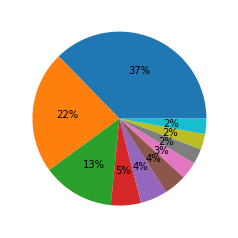

In [104]:
import matplotlib.pyplot as plt
plt.subplot(aspect=True)
plt.pie(plot_data, autopct='%i%%')